In [1]:
# import function to simulate multivariate poisson process data
import simulatePLDS as plds
import numpy as np
import scipy as sp

In [2]:
# define process model parameters
A = np.diag([.8, .3])
print A
Sigma = .5*np.asarray([[1, .5], [.5, 1]])
# define measurement model parameters
B = np.diag([2, 2])
print B
# set time length and initial parameters
T = 50
x_0 = np.random.randn(1,2)[0]

[[ 0.8  0. ]
 [ 0.   0.3]]
[[2 0]
 [0 2]]


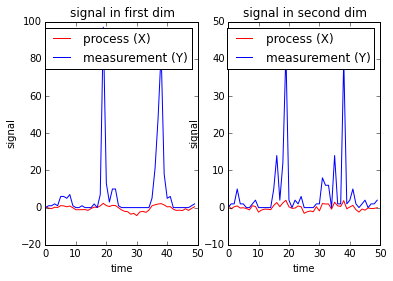

In [3]:
# plot 2d observed (Y) and hidden (X) signal
import matplotlib.pyplot as plt
%matplotlib inline
[hidden, obs] = plds.simulateStateSpace(A,B,Sigma,T,x_0)
plt.subplots_adjust(right=1.85, hspace=.85)

In [4]:
B

array([[2, 0],
       [0, 2]])

In [5]:
# import auxiliary particle filter code
from apf12 import *
n_particles = 500

In [6]:
# run particle filter
[w, x, k] = apf(obs, T, n_particles, A, B, Sigma, x_0)

time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9
time:  10
time:  11
time:  12
time:  13
time:  14
time:  15
time:  16
time:  17
time:  18
time:  19
time:  20
time:  21
time:  22
time:  23
time:  24
time:  25
time:  26
time:  27
time:  28
time:  29
time:  30
time:  31
time:  32
time:  33
time:  34
time:  35
time:  36
time:  37
time:  38
time:  39
time:  40
time:  41
time:  42
time:  43
time:  44
time:  45
time:  46
time:  47
time:  48
time:  49


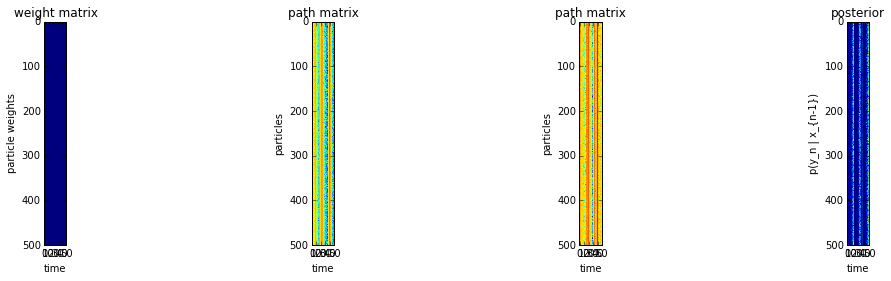

In [7]:
# visualize parameters
import matplotlib.pyplot as plt
%matplotlib inline
#parts = np.array([np.array(xi) for xi in w])
plt.subplot(141)
plt.imshow(w)
plt.xlabel('time')
plt.ylabel('particle weights')
plt.title('weight matrix')
plt.subplot(142)
plt.imshow(x[:,:,0])
plt.xlabel('time')
plt.ylabel('particles')
plt.title('path matrix')
plt.subplot(143)
plt.imshow(x[:,:,1])
plt.xlabel('time')
plt.ylabel('particles')
plt.title('path matrix')
plt.subplot(144)
plt.imshow(k)
plt.xlabel('time')
plt.ylabel('p(y_n | x_{n-1})')
plt.title('posterior')
plt.subplots_adjust(right=2.5, hspace=.75)

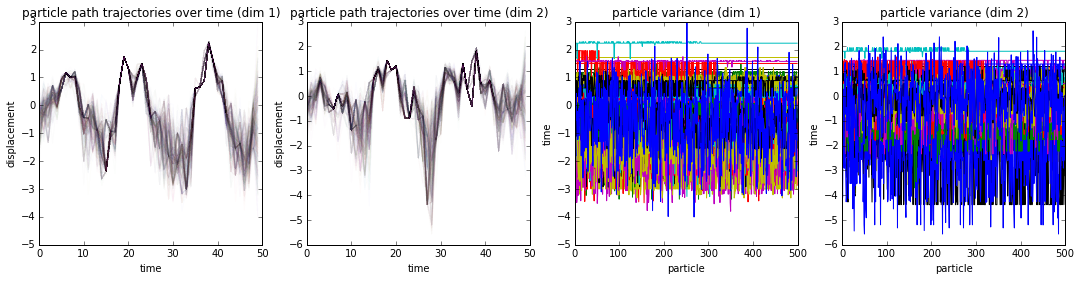

In [8]:
# examine particle trajectories over time
plt.subplot(141)
plt.plot(np.transpose(x[:,:,0]), alpha=.01, linewidth=1.5)
plt.xlabel('time')
plt.ylabel('displacement')
plt.title('particle path trajectories over time (dim 1)')

plt.subplot(142)
plt.plot(np.transpose(x[:,:,1]), alpha=.01, linewidth=1.5)
plt.xlabel('time')
plt.ylabel('displacement')
plt.title('particle path trajectories over time (dim 2)')


plt.subplot(143)
plt.plot(x[:,:,0])
plt.xlabel('particle')
plt.ylabel('time')
plt.title('particle variance (dim 1)')
plt.subplot(144)

plt.plot(x[:,:,1])
plt.xlabel('particle')
plt.ylabel('time')
plt.title('particle variance (dim 2)')
plt.subplots_adjust(right=2.5, hspace=.85)

In [9]:
# average over particle trajectories to obtain predicted state means for APF output
predsignal1 = np.mean(x[:,:,0], axis=0)
predsignal2 = np.mean(x[:,:,1], axis=0)

In [10]:
hidden[:,0]

array([ 0.4177158 , -0.25765847, -0.56816513,  0.1879963 ,  0.0780827 ,
        1.0512972 ,  0.92271033,  0.43064891,  0.85263395, -0.07340068,
       -1.1664881 , -1.15117839, -1.09830007, -1.07759017, -1.46443028,
       -0.48680906,  0.25306357,  0.0868663 ,  0.94150588,  2.28051887,
        1.09540583,  0.57862673,  1.19680995,  1.08555357, -0.03912804,
       -1.2687557 , -1.99858012, -2.17529538, -3.55121511, -3.10383216,
       -4.30951756, -2.3264598 , -2.02426818, -2.56559233, -1.34269262,
        0.95574228,  1.50548614,  1.91515292,  2.14662882,  1.42721268,
        0.42470902,  0.51579517, -0.86788301, -1.51625393, -1.37444219,
       -1.59711166, -0.60727053, -1.52646386, -0.43083667,  0.43673842])

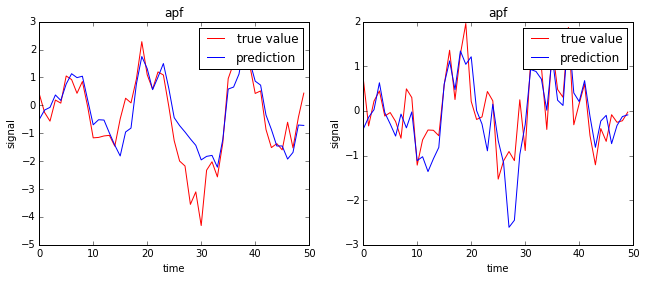

In [11]:
# check true values against standard kalman filter output
time = np.arange(T)
#plt.subplot(121)
#lo = plt.plot(time, hidden, 'r', time, filtered_state_means, 'b')
#plt.xlabel('time')
#plt.ylabel('signal')
#plt.title('kalman filter')
#plt.legend(lo, ('true value','prediction'))

plt.subplot(121)
plt.title('apf')
lo = plt.plot(time, hidden[:,0], 'r', time, predsignal1, 'b')
plt.xlabel('time')
plt.ylabel('signal')
plt.legend(lo, ('true value','prediction'))

plt.subplot(122)
plt.title('apf')
lo = plt.plot(time, hidden[:,1], 'r', time, predsignal2, 'b')
plt.xlabel('time')
plt.ylabel('signal')
plt.legend(lo, ('true value','prediction'))
plt.subplots_adjust(right=1.5, hspace=.75)

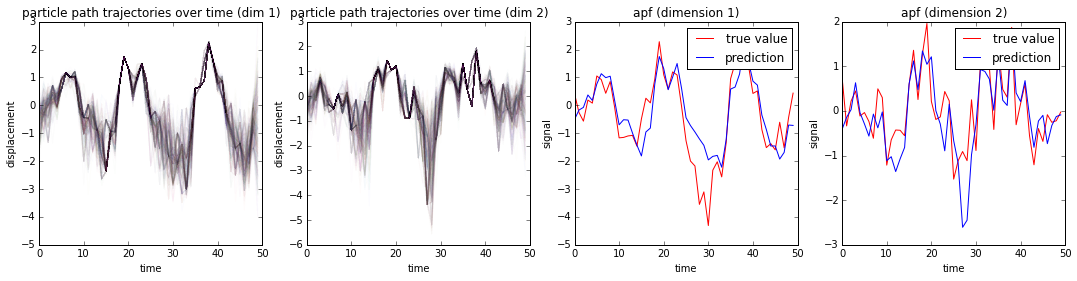

In [12]:
# examine particle trajectories over time
plt.subplot(141)
plt.plot(np.transpose(x[:,:,0]), alpha=.01, linewidth=1.5)
plt.xlabel('time')
plt.ylabel('displacement')
plt.title('particle path trajectories over time (dim 1)')

plt.subplot(142)
plt.plot(np.transpose(x[:,:,1]), alpha=.01, linewidth=1.5)
plt.xlabel('time')
plt.ylabel('displacement')
plt.title('particle path trajectories over time (dim 2)')


plt.subplot(143)
plt.title('apf (dimension 1)')
lo = plt.plot(time, hidden[:,0], 'r', time, predsignal1, 'b')
plt.xlabel('time')
plt.ylabel('signal')
plt.legend(lo, ('true value','prediction'))

plt.subplot(144)
plt.title('apf (dimension 2)')
lo = plt.plot(time, hidden[:,1], 'r', time, predsignal2, 'b')
plt.xlabel('time')
plt.ylabel('signal')
plt.legend(lo, ('true value','prediction'))
plt.subplots_adjust(right=2.5, hspace=.95)

In [13]:
from pykalman import KalmanFilter
# run kalman filter and check parameters
#print A, B
kf = KalmanFilter(transition_matrices = A, observation_matrices = B)
kf = kf.em(obs, n_iter=50)
(filtered_state_means, filtered_state_covariances) = kf.filter(obs)
(smoothed_state_means, smoothed_state_covariances) = kf.smooth(obs)

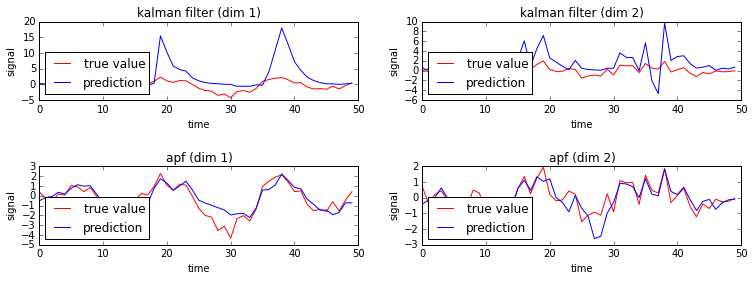

In [14]:
# check true values against standard kalman filter output
plt.subplot(221)
lo = plt.plot(time, hidden[:,0], 'r', time, filtered_state_means[:,0], 'b')
plt.xlabel('time')
plt.ylabel('signal')
plt.title('kalman filter (dim 1)')
plt.legend(lo, ('true value','prediction'), loc='lower left')
#plt.plot(filtered_state_means[:,0])

plt.subplot(223)
plt.title('apf (dim 1)')
lo = plt.plot(time, hidden[:,0], 'r', time, predsignal1, 'b')
plt.xlabel('time')
plt.ylabel('signal')
plt.legend(lo, ('true value','prediction'), loc='lower left')
plt.subplots_adjust(right=1.5, hspace=.75)

plt.subplot(222)
lo = plt.plot(time, hidden[:,1], 'r', time, filtered_state_means[:,1], 'b')
plt.xlabel('time')
plt.ylabel('signal')
plt.title('kalman filter (dim 2)')
plt.legend(lo, ('true value','prediction'), loc='lower left')
#plt.plot(filtered_state_means[:,0])

plt.subplot(224)
plt.title('apf (dim 2)')
lo = plt.plot(time, hidden[:,1], 'r', time, predsignal2, 'b')
plt.xlabel('time')
plt.ylabel('signal')
plt.legend(lo, ('true value','prediction'), loc='lower left')
plt.subplots_adjust(right=1.75, hspace=.85)